**Uploading the dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Data.csv')
display(df)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
x=df.iloc[:,:3]
y=df.iloc[:,3]

In [ ]:
print(type(x),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


**Data Preprocessing**

In [ ]:
#Method 1
#df.dropna()

In [ ]:
#Method2
#Manually adding values

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
df.iloc[:,1:3]=imputer.fit_transform(df.iloc[:,1:3])
display(df)

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[0])],remainder='passthrough')
df2 = pd.DataFrame(ct.fit_transform(df))
df2.rename(columns={0:'France',1:'Germany',2:'Spain',3:'Age',4:'Salary',5:'Purchased'},inplace=True)
display(df2)


,France,Germany,Spain,Age,Salary,Purchased
0,1,0,0,44,72000,No
1,0,0,1,27,48000,Yes
2,0,1,0,30,54000,No
3,0,0,1,38,61000,No
4,0,1,0,40,63777.8,Yes
5,1,0,0,35,58000,Yes
6,0,0,1,38.7778,52000,No
7,1,0,0,48,79000,Yes
8,0,1,0,50,83000,No
9,1,0,0,37,67000,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Purchased'] = le.fit_transform(df2['Purchased'].values)
display(df2)

,France,Germany,Spain,Age,Salary,Purchased
0,1,0,0,44,72000,0
1,0,0,1,27,48000,1
2,0,1,0,30,54000,0
3,0,0,1,38,61000,0
4,0,1,0,40,63777.8,1
5,1,0,0,35,58000,1
6,0,0,1,38.7778,52000,0
7,1,0,0,48,79000,1
8,0,1,0,50,83000,0
9,1,0,0,37,67000,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


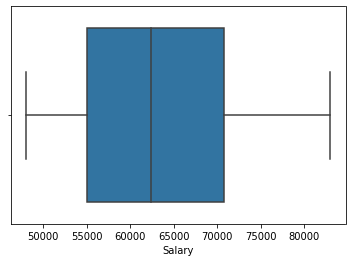

In [ ]:
import seaborn as sns
sns.boxplot(df2['Salary'])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df2[['Age','Salary']]=sc.fit_transform(df2[['Age','Salary']].values)
display(df2)

,France,Germany,Spain,Age,Salary,Purchased
0,1,0,0,0.758874,7.494733e-01,0
1,0,0,1,-1.711504,-1.438178e+00,1
2,0,1,0,-1.275555,-8.912655e-01,0
3,0,0,1,-0.113024,-2.532004e-01,0
4,0,1,0,0.177609,6.632192e-16,1
5,1,0,0,-0.548973,-5.266569e-01,1
6,0,0,1,0.000000,-1.073570e+00,0
7,1,0,0,1.340140,1.387538e+00,1
8,0,1,0,1.630773,1.752147e+00,0
9,1,0,0,-0.258340,2.937125e-01,1


**Linear regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Salary_Data.csv')
df.rename(columns={"YearsExperience":"Exp"},inplace=True)
df.dropna()
display(df.head())

,Exp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
x = df.iloc[:,0].values
y = df.iloc[:,1].values
x = x.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=1/3, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
print(lr.score(xtest,ytest))

0.9749154407708353


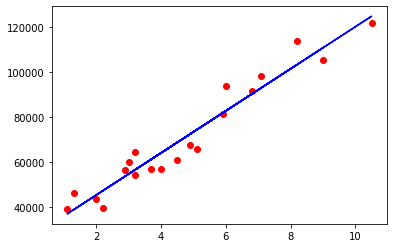

In [ ]:
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,lr.predict(xtrain),color='blue')
plt.show()

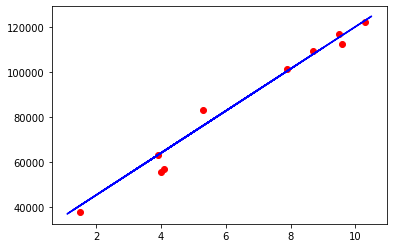

In [ ]:
plt.scatter(xtest,ytest,color='red')
plt.plot(xtrain,lr.predict(xtrain),color='blue')
plt.show()

**Multiple linear regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/50_Startups.csv')
display(df.head())

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encoder',OneHotEncoder(),[3])],remainder='passthrough')
df = pd.DataFrame(ct.fit_transform(df))
df.columns = ['California','Florida','NY','R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
display(df.head())

,California,Florida,NY,R&D Spend,Administration,Marketing Spend,Profit
0,0.0,0.0,1.0,165349.20,136897.80,471784.10,192261.83
1,1.0,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,0.0,1.0,0.0,153441.51,101145.55,407934.54,191050.39
3,0.0,0.0,1.0,144372.41,118671.85,383199.62,182901.99
4,0.0,1.0,0.0,142107.34,91391.77,366168.42,166187.94


In [ ]:
df.drop(['California'],axis=1)

,Florida,NY,R&D Spend,Administration,Marketing Spend,Profit
0,0.0,1.0,165349.20,136897.80,471784.10,192261.83
1,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,1.0,0.0,153441.51,101145.55,407934.54,191050.39
3,0.0,1.0,144372.41,118671.85,383199.62,182901.99
4,1.0,0.0,142107.34,91391.77,366168.42,166187.94
5,0.0,1.0,131876.90,99814.71,362861.36,156991.12
6,0.0,0.0,134615.46,147198.87,127716.82,156122.51
7,1.0,0.0,130298.13,145530.06,323876.68,155752.60
8,0.0,1.0,120542.52,148718.95,311613.29,152211.77
9,0.0,0.0,123334.88,108679.17,304981.62,149759.96


In [ ]:
x = df.iloc[:,:5].values
y = df.iloc[:,5].values

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ypred = lr.predict(xtest)

In [ ]:
new_df = pd.DataFrame([ytest,ypred]).transpose()
new_df

,0,1
0,118148.20,168804.193321
1,249744.55,289080.975287
2,229160.95,313411.875969
3,164470.71,179860.317195
4,407934.54,432327.525232
5,353183.81,179661.158582
6,185265.10,127410.009761
7,88218.23,132781.319853
8,303319.26,242304.807043
9,366168.42,417347.336201


In [ ]:
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(ypred,ytest))
rms

73368.04223257967

In [ ]:
import statsmodels.api as sm
x = np.append(arr = np.ones((50, 1)).astype(int), values = x, axis = 1)
X_opt = x[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     15.94
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           3.38e-08
Time:                        05:02:41   Log-Likelihood:                -634.09
No. Observations:                  50   AIC:                             1278.
Df Residuals:                      45   BIC:                             1288.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.328e+05   3.94e+04      3.368      0.002    5.34e+04    2.12e+05
x1          3.322e+04   2.07e+04      1.603      0.116   -8517.551    7.49e+04
x2          6.629e+04   2.16e+04      3.075      0.004    2.29e+04     1.1e+05
x3          3.331e+04    2.1e+04      1.583      0.120   -9074.828    7.57e+04
x4             2.0343      0.266      7.640      0.000       1.498       2.571
x5            -0.9526      0.431     -2.208      0.032      -1.822      -0.084
==============================================================================
Omnibus:                        1.093   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.398
Skew:                          -0.022   Prob(JB):                        0.820
Kurtosis:                       3.435   Cond. No.                     3.88e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.15e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
X_opt = x[:, [0, 1, 2, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     15.94
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           3.38e-08
Time:                        05:03:31   Log-Likelihood:                -634.09
No. Observations:                  50   AIC:                             1278.
Df Residuals:                      45   BIC:                             1288.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.661e+05   5.52e+04      3.012      0.004     5.5e+04    2.77e+05
x1           -94.2799   2.83e+04     -0.003      0.997   -5.71e+04    5.69e+04
x2          3.298e+04   2.86e+04      1.152      0.255   -2.47e+04    9.06e+04
x3             2.0343      0.266      7.640      0.000       1.498       2.571
x4            -0.9526      0.431     -2.208      0.032      -1.822      -0.084
==============================================================================
Omnibus:                        1.093   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.398
Skew:                          -0.022   Prob(JB):                        0.820
Kurtosis:                       3.435   Cond. No.                     7.17e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_opt = x[:, [0, 2, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     21.72
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           6.55e-09
Time:                        05:03:59   Log-Likelihood:                -634.09
No. Observations:                  50   AIC:                             1276.
Df Residuals:                      46   BIC:                             1284.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.661e+05   5.24e+04      3.170      0.003    6.06e+04    2.72e+05
x1          3.303e+04   2.48e+04      1.334      0.189   -1.68e+04    8.29e+04
x2             2.0343      0.262      7.768      0.000       1.507       2.562
x3            -0.9526      0.427     -2.233      0.030      -1.811      -0.094
==============================================================================
Omnibus:                        1.093   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.398
Skew:                          -0.021   Prob(JB):                        0.820
Kurtosis:                       3.435   Cond. No.                     6.72e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_opt = x[:, [0, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     31.18
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           2.41e-09
Time:                        05:05:15   Log-Likelihood:                -635.04
No. Observations:                  50   AIC:                             1276.
Df Residuals:                      47   BIC:                             1282.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.75e+05   5.24e+04      3.340      0.002    6.96e+04     2.8e+05
x1             2.0715      0.263      7.890      0.000       1.543       2.600
x2            -0.9615      0.430     -2.235      0.030      -1.827      -0.096
==============================================================================
Omnibus:                        2.504   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.286   Jarque-Bera (JB):                1.797
Skew:                          -0.035   Prob(JB):                        0.407
Kurtosis:                       3.926   Cond. No.                     6.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Polynomial regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Position_Salaries.csv')
display(df.head())

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
df.drop(['Position'],inplace=True,axis=1)
display(df.head())

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [ ]:
x = df.iloc[:,:1].values
y = df.iloc[:,1].values

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 4)
x_poly = pf.fit_transform(x)

lr2 = LinearRegression()
lr2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

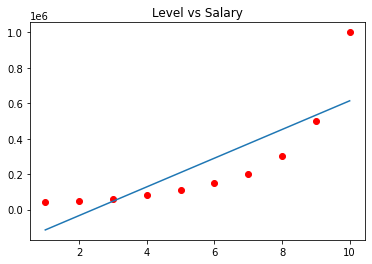

In [ ]:
plt.scatter(x,y,color='red')
plt.plot(x,lr.predict(x))
plt.title('Level vs Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

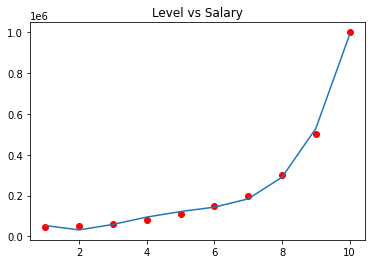

In [ ]:
plt.scatter(x,y,color='red')
plt.plot(x,lr2.predict(x_poly))
plt.title('Level vs Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

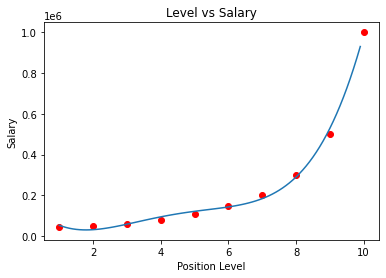

In [ ]:
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color='red')
plt.plot(x_grid,lr2.predict(pf.fit_transform(x_grid)))
plt.title('Level vs Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
lr.predict([[6.5]])

array([330378.78787879])

In [ ]:
lr2.predict(pf.fit_transform([[6.5]]))

array([158862.45265155])

**Support vector regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Position_Salaries.csv')
df.drop(['Position'],axis = 1,inplace=True)
display(df.head())

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [ ]:
x = df.iloc[:,:1].values
y = df.iloc[:,1].values
y = y.reshape(len(y),1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
x = scx.fit_transform(x)
scy = StandardScaler()
y = scy.fit_transform(y)

In [ ]:
from sklearn.svm import SVR
reg = SVR(kernel = 'rbf')
reg.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
scy.inverse_transform(reg.predict(scx.transform(np.array([[6.5]]))))

array([170370.0204065])

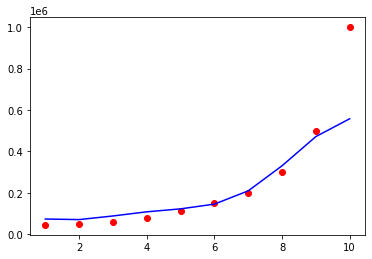

In [ ]:
plt.scatter(scx.inverse_transform(x),scy.inverse_transform(y),color='red')
plt.plot(scx.inverse_transform(x),scy.inverse_transform(reg.predict(x)),color='blue')
plt.show()


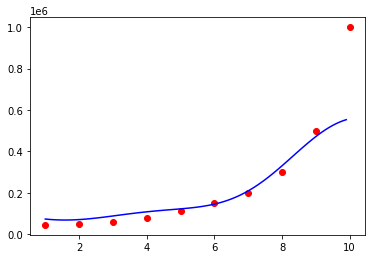

In [ ]:
x_new = np.arange(min(scx.inverse_transform(x)),max(scx.inverse_transform(x)),0.1)
x_new = x_new.reshape(len(x_new),1)
plt.scatter(scx.inverse_transform(x),scy.inverse_transform(y),color='red')
plt.plot(x_new,scy.inverse_transform(reg.predict(scx.transform(x_new))),color='blue')
plt.show()

**Decision tree regressor**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Position_Salaries.csv')
df.drop(['Position'],axis = 1,inplace=True)
display(df.head())

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
regressor.predict([[6.5]])

array([150000.])

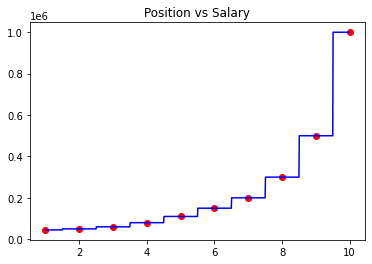

In [ ]:
x_grid = np.arange(min(X),max(X),0.01)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(X,y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid) ,color = 'blue')
plt.title('Position vs Salary')
plt.show()

**Random Forest regressor**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Position_Salaries.csv')
df.drop(['Position'],axis = 1,inplace=True)
display(df.head())

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [ ]:
x = (df['Level'].values).reshape(-1,1)
y = df['Salary'].values

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=300,random_state=0)
reg.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
reg.predict([[6.5]])

array([160333.33333333])

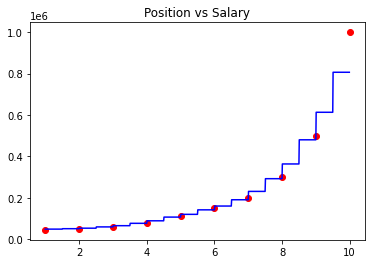

In [ ]:
x_grid = np.arange(min(x),max(x),0.01)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x,y, color = 'red')
plt.plot(x_grid, reg.predict(x_grid) ,color = 'blue')
plt.title('Position vs Salary')
plt.show()